<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Generating-the-Submission-File" data-toc-modified-id="Generating-the-Submission-File-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Generating the Submission File</a></span><ul class="toc-item"><li><span><a href="#Creating-the-directory-for-the-submission-file" data-toc-modified-id="Creating-the-directory-for-the-submission-file-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Creating the directory for the submission file</a></span></li><li><span><a href="#Generating-the-submission-file" data-toc-modified-id="Generating-the-submission-file-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Generating the submission file</a></span></li></ul></li><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Interpretation</a></span><ul class="toc-item"><li><span><a href="#Creating-the-directory-for-the-figures" data-toc-modified-id="Creating-the-directory-for-the-figures-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Creating the directory for the figures</a></span></li><li><span><a href="#Getting-the-feature-importance-detected-by-random-forest" data-toc-modified-id="Getting-the-feature-importance-detected-by-random-forest-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Getting the feature importance detected by random forest</a></span></li><li><span><a href="#Plotting-the-Feature-Importance" data-toc-modified-id="Plotting-the-Feature-Importance-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Plotting the Feature Importance</a></span></li></ul></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size="4">
Part 2, Chapter 2, Section 5: Tree Based Models
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Homework 3
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yuxiao Huang
</font>
</center>
</p>
</b>

# Overview

- This notebook includes homework 3 for Tree Based Models (Part 2, Chapter 2, Section 5).
- See the accompanied slides in our [github repository](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/spring_2022/slides/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s5_tree_based_models).
- Here we will work on kaggle competation kaggle competation [Ghouls, Goblins, and Ghosts... Boo!](https://www.kaggle.com/c/ghouls-goblins-and-ghosts-boo/overview).
- The goal of this homework is tweaking the pipeline (including data preprocessing, hyperparameter tuning and model selection) implemented in [/p2 c2 s5 tree_based_models/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2022/code/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s5_tree_based_models/case_study/case_study.ipynb) to make it work for the new kaggle competation mentioned above.
- Complete the missing parts indicated by # Implement me.
- Particularly, the code should
    - be bug-free (note that the output produced by your solution may not necessarily be the same as the provided output, due to version issues)
    - be commented
- **The baseline for this assignment is 0.769772. As per the grading rubrics (section 15 of the syllabus), if the validation score of your best model is lower than or the same as the baseline, you will only receive 80% of the full mark. See more details in the grading rubrics.**
- Submit an ipynb file named homework_3.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Assignments/Homework_3/.

# Notebook Configuration

## Google drive

In [1]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/Homework/Homework 3/Data/'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/Utilities/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/Models/'

Mounted at /content/drive


## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [4]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [6]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Colab Notebooks/Utilities


**Load Train and Test data**

In [7]:
# Implement me
import pandas as pd

# Load Train and Test data files
df_train_raw=pd.read_csv(abspath_curr+'train.csv')
df_test_raw=pd.read_csv(abspath_curr+'test.csv')

# Duplicate loaded train and test data to work with
df_train=df_train_raw.copy(deep=True)
df_test=df_test_raw.copy(deep=True)

# Define the target variable
target='type'

Get Dataframe Shapes

In [8]:
# Get shape of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['Rows', 'Columns'])

,Rows,Columns
0,371,7


In [9]:
# Get shape of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['Rows', 'Columns'])

,Rows,Columns
0,529,6


View Dataframes

In [10]:
# Display df_train dataframe
df_train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [11]:
# Look at df_train variable data types
df_train.dtypes

id                 int64
bone_length      float64
rotting_flesh    float64
hair_length      float64
has_soul         float64
color             object
type              object
dtype: object

In [12]:
# Display df_test
df_test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [13]:
# Look at df_test variable data types
df_test.dtypes

id                 int64
bone_length      float64
rotting_flesh    float64
hair_length      float64
has_soul         float64
color             object
dtype: object

**Splitting train data into train and val datasets**

In [14]:
from sklearn.model_selection import train_test_split
# Divide training data into df_train (80%) and df_val(20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed )

# Reset df_train and df_val indexes
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [15]:
# Print new df_train dataframe
df_train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,472,0.681615,0.529227,0.625242,0.615308,white,Ghoul
1,170,0.480836,0.407930,0.539005,0.495069,clear,Goblin
2,189,0.375197,0.742953,0.320764,0.243440,blue,Ghost
3,861,0.626017,0.172182,0.408422,0.644941,blue,Ghoul
4,30,0.250770,0.246258,0.554654,0.250036,black,Ghost


In [16]:
# Print new df_val dataframe
df_val.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,779,0.516004,0.527508,0.354857,0.760432,white,Ghoul
1,72,0.523729,0.318483,0.330146,0.427402,green,Goblin
2,29,0.500197,0.438418,0.532530,0.665522,clear,Ghoul
3,745,0.417300,0.377595,0.541834,0.349087,clear,Goblin
4,119,0.515275,0.582627,0.568721,0.534079,clear,Goblin


**Handling Uncommon Features**

Identifying Uncommon Features

In [17]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,bone_length
1,color
2,hair_length
3,has_soul
4,id
5,rotting_flesh
6,type


In [18]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [19]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [20]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


There are no uncommon features that need to be removed from any of the dataframes

**Handling Identifiers**

Combining train, val, and test dataframes

In [21]:
# Combine train, val, and test dataframes
df=pd.concat([df_train, df_val, df_test], sort=False)

In [22]:
# Call id checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

,id
0,472
1,170
2,189
3,861
4,30


Remove Identifiers

In [23]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [24]:
# Print the first 5 rows of df_train
df_train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.681615,0.529227,0.625242,0.615308,white,Ghoul
1,0.480836,0.407930,0.539005,0.495069,clear,Goblin
2,0.375197,0.742953,0.320764,0.243440,blue,Ghost
3,0.626017,0.172182,0.408422,0.644941,blue,Ghoul
4,0.250770,0.246258,0.554654,0.250036,black,Ghost


In [25]:
# Print the first 5 rows of df_val
df_val.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.516004,0.527508,0.354857,0.760432,white,Ghoul
1,0.523729,0.318483,0.330146,0.427402,green,Goblin
2,0.500197,0.438418,0.532530,0.665522,clear,Ghoul
3,0.417300,0.377595,0.541834,0.349087,clear,Goblin
4,0.515275,0.582627,0.568721,0.534079,clear,Goblin


In [26]:
# Print the first 5 rows of df_test
df_test.head()

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.471774,0.387937,0.706087,0.698537,black
1,0.427332,0.645024,0.565558,0.451462,white
2,0.549602,0.491931,0.660387,0.449809,black
3,0.638095,0.682867,0.471409,0.356924,white
4,0.361762,0.583997,0.377256,0.276364,black


**Handling Missing Values**

Combining Train, Val, and Test Dataframes

In [27]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

Identifyin Missing Values

In [28]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,type,0.587778,object


In [29]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,object


In [30]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype


Split Train, Val, and Test Dataframes

In [31]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [32]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,296,6


In [33]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,75,6


In [34]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,529,6


**Imputting Missing Data**

In [35]:
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

    # Impute the variables with missing values in df_train, df_val and df_test 
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

**Encoding the Data**

Combining Train, Val, and Test Dataframes

In [36]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,float64
1,object


Identifying Categorical Variables

In [37]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,color,6
1,type,4


Encoding the Categorical Features

In [38]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(np.intersect1d(df.columns, df_cat['var']), [target]))

# Print the first 5 rows of df
df.head()

,bone_length,rotting_flesh,hair_length,has_soul,type,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0.681615,0.529227,0.625242,0.615308,Ghoul,0,0,0,0,0,1
1,0.480836,0.407930,0.539005,0.495069,Goblin,0,0,0,1,0,0
2,0.375197,0.742953,0.320764,0.243440,Ghost,0,0,1,0,0,0
3,0.626017,0.172182,0.408422,0.644941,Ghoul,0,0,1,0,0,0
4,0.250770,0.246258,0.554654,0.250036,Ghost,1,0,0,0,0,0


Encoding Categorical Target

In [39]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode categorical target in the combined data
df[target] = le.fit_transform(df[target].astype(str))

# Print the first 5 rows of df
df.head()

,bone_length,rotting_flesh,hair_length,has_soul,type,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0.681615,0.529227,0.625242,0.615308,1,0,0,0,0,0,1
1,0.480836,0.407930,0.539005,0.495069,2,0,0,0,1,0,0
2,0.375197,0.742953,0.320764,0.243440,0,0,0,1,0,0,0
3,0.626017,0.172182,0.408422,0.644941,1,0,0,1,0,0,0
4,0.250770,0.246258,0.554654,0.250036,0,1,0,0,0,0,0


Seperating Train, Val, and Test Data

In [40]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [41]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,296,11


In [42]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,75,11


In [43]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,529,11


Splitting the Feature and Target

In [44]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

**Scaling the Data**

Standardization

In [45]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

Standardizing the Feature

In [46]:
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

# Hyperparameter Tuning

Creating the Dictionary of the models
- In the dictionary:
    - the key is the acronym of the model
    - the value is the model



In [47]:
# Implement me
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'hgbc': HistGradientBoostingClassifier(random_state=random_seed)}

**Creating the dictionary of the pipelines**
In the dictionary:
- the key is the acronym of the model
- the value is the pipeline, which, for now, only includes the model

In [48]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

Get the Predefined split cross-Validator

In [49]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

**GridSearchCV**

**Creating the dictionary of the parameter grids**
- In the dictionary:
    - the key is the acronym of the model
    - the value is the parameter grid of the model

In [50]:
param_grids = {}

The parameter grid for LogisticRegression
- The hyperparameters we want to fine-tune are:
    - tol
    - C

In [51]:
# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3]

# The parameter grid of C
C_grid = [0.1, 1, 10]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

**The parameter grid for MLPClassifier**
- The hyperparameters we want to fine-tune are:
    - alpha
    - learning_rate_init

In [52]:
# The grids for alpha
alpha_grids = [10 ** i for i in range(-5, -2)]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-4, -1)]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

**The parameter grid for random forest**
- The hyperparameters we want to fine-tune are:
    - min_samples_split
    - min_samples_leaf

In [53]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

**The parameter grid for histogram-based gradient boosting**
- The hyperparameters we want to fine-tune are:
- learning_rate
- min_samples_leaf

In [54]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

**Creating the directory for the cv results produced by GridSearchCV**

In [55]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/halloween/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

Tuning the Hyperparameters

In [56]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result/titanic/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.769772,"{'model__alpha': 1e-05, 'model__learning_rate_...","(MLPClassifier(alpha=1e-05, early_stopping=Tru..."
1,0.735064,"{'model__C': 10, 'model__tol': 1e-05}","(LogisticRegression(C=10, class_weight='balanc..."
2,0.731838,"{'model__learning_rate': 0.01, 'model__min_sam...",(HistGradientBoostingClassifier(learning_rate=...
3,0.730319,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(max_features='auto', ..."


**Hypertuning Round 2**

Logistic Regression

In [57]:
# The parameter grid of tol
tol_grid = [10 ** -7, 10 ** -6, 10 ** -5, 10 ** -4]

# The parameter grid of C
C_grid = [5, 10, 15]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

MLP Classifier

In [58]:
# The grids for alpha
alpha_grids = [10 ** i for i in range(-7, -4)]

# The grids for learning_rate_init
learning_rate_init_grids = [0.005, 0.01, 0.015]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

**Random Forest Classifier**

In [59]:
# The grids for min_samples_split
min_samples_split_grids = [15, 20, 25, 35, 50]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 2, 5, 10]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

**HistGradientBoosting Classifier**

In [60]:
# The grids for learning_rate
learning_rate_grids = [0.005, 0.01, 0.015]

# The grids for min_samples_leaf
min_samples_leaf_grids = [5, 10, 20, 30, 35]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

Make Directory of Model Parameters

In [61]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/halloween/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

Tuning the Hyperparameters

In [62]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result/titanic/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.781746,"{'model__alpha': 1e-07, 'model__learning_rate_...","(MLPClassifier(alpha=1e-07, early_stopping=Tru..."
1,0.735064,"{'model__C': 10, 'model__tol': 1e-07}","(LogisticRegression(C=10, class_weight='balanc..."
2,0.731838,"{'model__learning_rate': 0.01, 'model__min_sam...",(HistGradientBoostingClassifier(learning_rate=...
3,0.730319,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(max_features='auto', ..."


**Hyperparameter Tuning Round 3**

Logistic Regression

In [63]:
# The parameter grid of tol
tol_grid = [10 ** -9, 10 ** -8, 10 ** -7, 10 ** -6]

# The parameter grid of C
C_grid = [8, 10, 12]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

MLP Classifier

In [64]:
# The grids for alpha
alpha_grids = [10 ** i for i in range(-9, -6)]

# The grids for learning_rate_init
learning_rate_init_grids = [0.01, 0.015, 0.02, 0.025]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

Random Forest Classifier

In [65]:
# The grids for min_samples_split
min_samples_split_grids = [17, 18, 19, 20, 21, 22, 23, 24, 25]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 2, 3, 4, 5]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

HistGradientBoosing Classifier

In [66]:
# The grids for learning_rate
learning_rate_grids = [0.0075, 0.01, 0.0125]

# The grids for min_samples_leaf
min_samples_leaf_grids = [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

Update Model Parameter Directory

In [67]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/halloween/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

Tuning the Hyperparameters

In [68]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result/titanic/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.781746,"{'model__alpha': 1e-09, 'model__learning_rate_...","(MLPClassifier(alpha=1e-09, early_stopping=Tru..."
1,0.746137,"{'model__learning_rate': 0.0125, 'model__min_s...",(HistGradientBoostingClassifier(learning_rate=...
2,0.735064,"{'model__C': 8, 'model__tol': 1e-09}","(LogisticRegression(C=8, class_weight='balance..."
3,0.730319,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(max_features='auto', ..."


# Model Selection

In [69]:
# Implement me
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

print(best_score_gs)
print(best_params_gs)
print(best_estimator_gs)

0.7817460317460317
{'model__alpha': 1e-09, 'model__learning_rate_init': 0.015}
Pipeline(steps=[('model',
                 MLPClassifier(alpha=1e-09, early_stopping=True,
                               learning_rate_init=0.015, random_state=42))])


# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

## Creating the directory for the submission file

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/boo/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Generating the submission file

In [ ]:
# Get the best_score, best_param and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

# Transform y_test_pred back to the original class
y_test_pred = le.inverse_transform(y_test_pred)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((df_raw_test['id'].to_numpy().reshape(-1, 1), y_test_pred.reshape(-1, 1))),
                         columns=['id', target])                                                                                      

# Generate the submission file
df_submit.to_csv(abspath_curr + '/result/boo/submission/submission.csv', index=False)                                                                                                                                                                  

# Interpretation

## Creating the directory for the figures

In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/result/boo/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Getting the feature importance detected by random forest

In [ ]:
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[3]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(df.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head()

,Features,Importance
0,hair_length,0.347978
1,has_soul,0.273273
2,bone_length,0.186953
3,rotting_flesh,0.161031
4,color_clear,0.00682848


## Plotting the Feature Importance

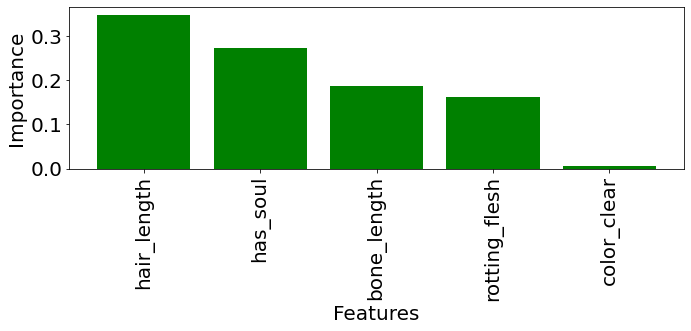

In [ ]:
# Create a figure
fig = plt.figure(figsize=(10, 5))

# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc['Features'][:5], df_fi_rfc['Importance'][:5], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/boo/figure/feature_importance_rfc.pdf')
plt.show()